# Training MNIST with Attention Mechanism 

In [1]:
from src.data import TokenDataset
from src.models import AttentionPool
from torch.utils.data import DataLoader
import torch 
from tqdm import tqdm 

DEVICE = "cuda:0"

train_set = TokenDataset(train=True)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
model = AttentionPool().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/home/bumjin/anaconda3/envs/deeping/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Training a model 

In [4]:

epochs = 5
model.train()
for epoch in range(epochs):
    running_loss = 0
    for x,y, x_origin in train_loader:
        x,y = x.to(DEVICE), y.to(DEVICE)
        y_hat = model(x)
        loss = torch.nn.CrossEntropyLoss()(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(running_loss)


926.527538061142
883.5934178829193
850.6451992988586
827.6821551322937
804.3016459941864


tensor(5) tensor(5, device='cuda:0')


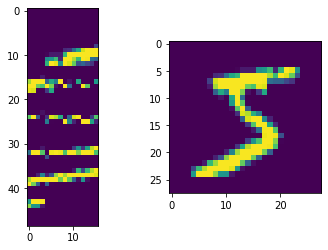

In [5]:
data = train_set[0][0]
y = train_set[0][1]
data_origin = train_set[0][2]

model.eval()
y_hat = model(data.unsqueeze(0).to(DEVICE))

import matplotlib.pyplot as plt 
fig, axes = plt.subplots(1,2)
axes[0].imshow(data.numpy())
axes[1].imshow(data_origin.numpy())
print(y, y_hat.argmax())

## Implement the validation case

In [4]:
valid_set = TokenDataset(train=False)
valid_loader = DataLoader(valid_set)

# TODO evalute the trained model 